<a href="https://colab.research.google.com/github/wangjuan001/planets/blob/master/Lesson2_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n = 100 

In [0]:
x = torch.ones(n,2)

In [0]:
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.1836,  1.0000],
        [-0.7794,  1.0000],
        [-0.5879,  1.0000],
        [-0.9681,  1.0000],
        [-0.7004,  1.0000]])

In [0]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

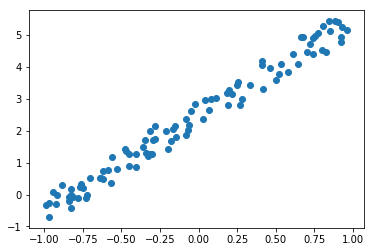

In [0]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(7.2149)

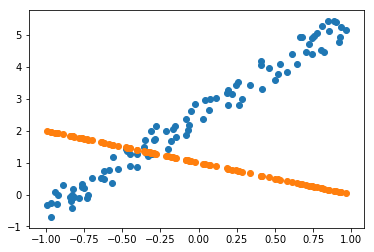

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y, y_hat)
  if t % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [0]:
??nn.Parameter.sub_

In [0]:
lr = 1e-1
for t in range(100):update()

tensor(7.2149, grad_fn=<MeanBackward0>)
tensor(1.4818, grad_fn=<MeanBackward0>)
tensor(0.4036, grad_fn=<MeanBackward0>)
tensor(0.1529, grad_fn=<MeanBackward0>)
tensor(0.0940, grad_fn=<MeanBackward0>)
tensor(0.0801, grad_fn=<MeanBackward0>)
tensor(0.0768, grad_fn=<MeanBackward0>)
tensor(0.0761, grad_fn=<MeanBackward0>)
tensor(0.0759, grad_fn=<MeanBackward0>)
tensor(0.0758, grad_fn=<MeanBackward0>)


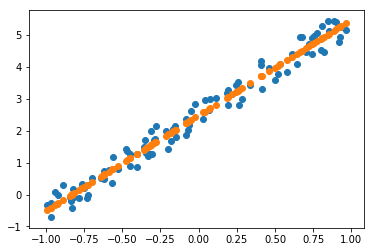

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

In [0]:
fig = plt.figure()
plt.scatter(x[:,0], y, c = 'orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)